In [1]:
import yastn
import yastn.tn.mps as mps
import matplotlib.pyplot as plt
import numpy as np
from operators import HXXZ, sumLn2, Ln, momentum_total

We want to recover 1305.3765 Fig. 3; starting with m/g=1/8 case

In [2]:
ops = yastn.operators.Spin12(sym='U1')  # "U1" enforces sum(Sz) conservation
#
# 1305.3765 is using x, mu; where x = 1/(g a)^2; mu = 2m/g^2 a and a=1 (?)
#
a = 1
g = 1 / 5
m = g / 8
e0 = a * g * g / 2
#
# this corresponds to x=25, mu=5/4 for a=1

In [3]:
# small test of sumLn2
N = 6
H1 = sumLn2(N, t=2, L0=1, v=1, Q=1, ops=ops)
L0 = Ln(0, N, t=2, L0=1, v=1, Q=1, ops=ops)
LL = L0 @ L0
for n in range(1, N-1):
    tmp = Ln(n, N, t=2, L0=1, v=1, Q=1, ops=ops)
    LL += tmp @ tmp
print((H1 - LL).norm())

6.755247921878556e-14


In [8]:
# We want to recover 1305.3765 Fig. 3(b)
N = 160

H0 = HXXZ(N, a, m, ops=ops)
H1 = e0 * sumLn2(N, t=0, ops=ops)
Op = momentum_total(N=N, ops=ops)
Op2 = Op @ Op

D = 64  # MPS bond dimension; based on 1305.3765 this will be enough
charge = 0 # this is a total Sz-spin for U1 symmetry
psis, engs, OP2s = [], [], []

for state in range(5):
    print(f" STATE = {state} ")
    psi = mps.random_mps(H0, D_total=D, n=charge)
    # sweeps of 2-site dmrg
    out = mps.dmrg_(psi, [H0, H1], project=psis, max_sweeps=100, energy_tol=1e-10, method='2site', opts_svd={"D_total": D})
    # followed by 1-site sweeeps
    # out = mps.dmrg_(psi, [H0, H1], project=psis, max_sweeps=100, energy_tol=1e-10, method='1site')
    print(out)
    psis.append(psi)
    engs.append(out.energy)
    OP2s.append(mps.vdot(psi, Op2, psi).real)


 STATE = 0 
DMRG_out(sweeps=10, energy=-47.960756201836936, denergy=8.064660050877137e-12, max_dSchmidt=None, max_discarded_weight=3.4671780955735606e-07)
 STATE = 1 
DMRG_out(sweeps=56, energy=-47.792779456766795, denergy=6.374278882503859e-11, max_dSchmidt=None, max_discarded_weight=1.4125005282057778e-05)
 STATE = 2 
DMRG_out(sweeps=100, energy=-47.78948420502932, denergy=1.9539761311193615e-06, max_dSchmidt=None, max_discarded_weight=2.1357184837141146e-05)
 STATE = 3 
DMRG_out(sweeps=100, energy=-47.77690870304672, denergy=5.540283964933224e-07, max_dSchmidt=None, max_discarded_weight=1.3741597623768462e-05)
 STATE = 4 
DMRG_out(sweeps=100, energy=-47.78198665835926, denergy=0.0002537485946518814, max_dSchmidt=None, max_discarded_weight=2.5220554747874935e-05)


In [9]:
OP2s

[0.13073067555703216,
 0.13673942614257362,
 0.155736537539413,
 0.22863193104344087,
 0.19612219917708196]

(0.0, 0.3)

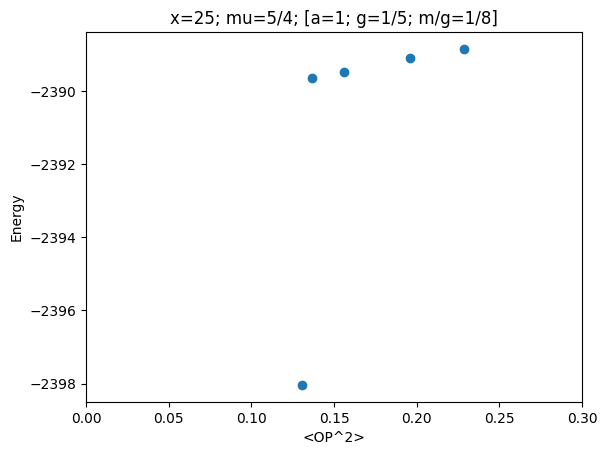

In [11]:

plt.plot(OP2s, np.array(engs) / e0, 'o')
plt.xlabel("<OP^2>")
plt.ylabel("Energy")
plt.title("x=25; mu=5/4; [a=1; g=1/5; m/g=1/8]")
plt.xlim([0, 0.3])

Now for m/g = 0 we do the same

In [12]:
m = 0
N = 160

H0 = HXXZ(N, a, m, ops=ops)
H1 = e0 * sumLn2(N, t=0, ops=ops)
Op = momentum_total(N=N, ops=ops)
Op2 = Op @ Op

D = 64  # MPS bond dimension; based on 1305.3765 this will be enough
charge = 0 # this is a total Sz-spin for U1 symmetry
psis, engs, OP2s = [], [], []

for state in range(5):
    print(f" STATE = {state} ")
    psi = mps.random_mps(H0, D_total=D, n=charge)
    # sweeps of 2-site dmrg
    out = mps.dmrg_(psi, [H0, H1], project=psis, max_sweeps=100, energy_tol=1e-10, method='2site', opts_svd={"D_total": D})
    # followed by 1-site sweeeps
    # out = mps.dmrg_(psi, [H0, H1], project=psis, max_sweeps=100, energy_tol=1e-10, method='1site')
    print(out)
    psis.append(psi)
    engs.append(out.energy)
    OP2s.append(mps.vdot(psi, Op2, psi).real)


 STATE = 0 
DMRG_out(sweeps=11, energy=-49.75750726634886, denergy=9.279688129026908e-12, max_dSchmidt=None, max_discarded_weight=7.657412050981236e-07)
 STATE = 1 
DMRG_out(sweeps=34, energy=-49.63430123233379, denergy=9.07576236386376e-11, max_dSchmidt=None, max_discarded_weight=1.9657525049866535e-05)
 STATE = 2 
DMRG_out(sweeps=100, energy=-49.62979633787755, denergy=2.0178298143491702e-08, max_dSchmidt=None, max_discarded_weight=2.487740482623223e-05)
 STATE = 3 
DMRG_out(sweeps=100, energy=-49.62262777731765, denergy=1.5939676245579903e-07, max_dSchmidt=None, max_discarded_weight=3.7364797107153114e-05)
 STATE = 4 
DMRG_out(sweeps=100, energy=-49.60444712863384, denergy=3.3704586059002395e-05, max_dSchmidt=None, max_discarded_weight=3.346611817204538e-05)


(0.0, 0.3)

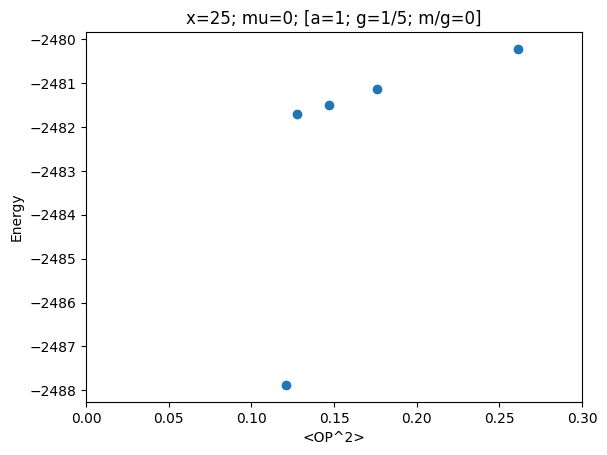

In [14]:
plt.plot(OP2s, np.array(engs) / e0, 'o')
plt.xlabel("<OP^2>")
plt.ylabel("Energy")
plt.title("x=25; mu=0; [a=1; g=1/5; m/g=0]")
plt.xlim([0, 0.3])

# This is matching Fig 3(a) of 1305.3765
# Higher energies can be done, but require longer simulations with more careful convergence